In [93]:
from bookworm import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)

import pandas as pd
import numpy as np
import networkx as nx
import community

In [95]:
interaction_df = pd.read_csv('data/ASOIAF001_Character_Interaction_From_Excel_List.csv')

In [96]:
G = nx.from_pandas_edgelist(interaction_df,
                             source='source',
                             target='target', edge_attr=True)

In [97]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

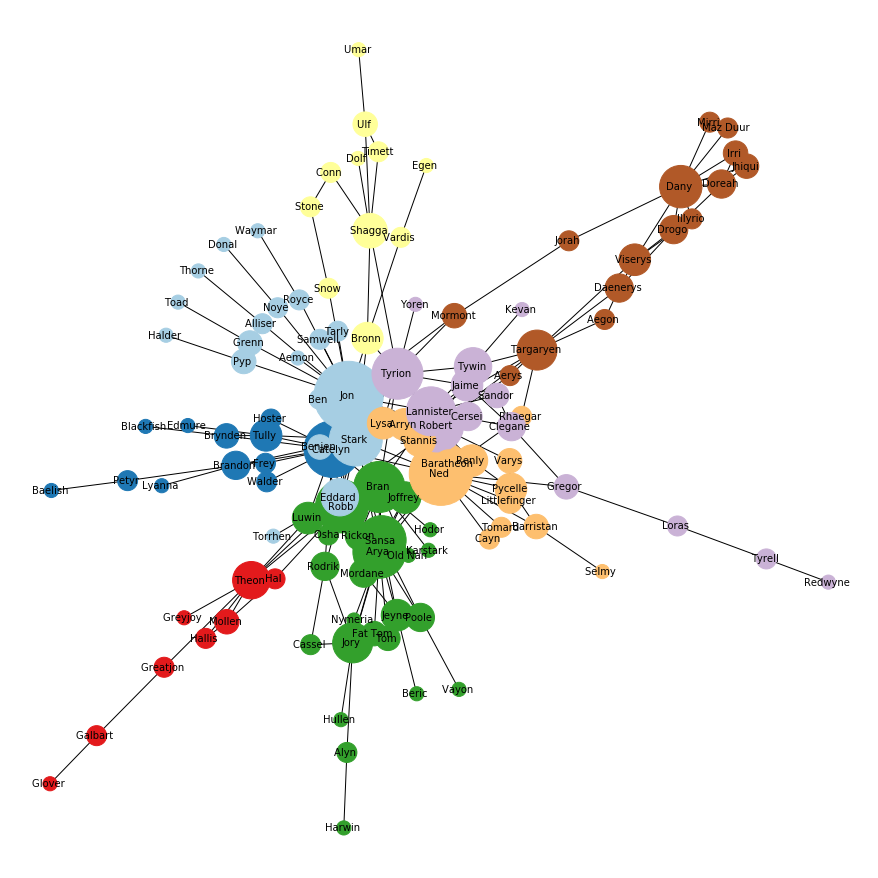

In [98]:
partitions = community.best_partition(Gc)
values = [partitions.get(node) for node in Gc.nodes()]

d = dict(Gc.degree)

#k=15, iterations=500 also works well
plt.figure(1,figsize=(12,12)) 
pos = nx.spring_layout(Gc, k=0.3*1/np.sqrt(len(Gc.nodes())), iterations=1000)
nx.draw(Gc,pos,
        cmap=plt.get_cmap("Paired"),
        node_color=values,
        with_labels=True, node_size=[v * 200 for v in d.values()], font_size=10)
plt.savefig('ASOIAF001_all.png')
plt.show()